# Исследование данных HR департамента

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

In [2]:
def digital_salary(row):
    if row['salary'] == "low":
        return 0
    elif row['salary'] == "medium":
        return 1
    elif row['salary'] == 'high':
        return 2

In [3]:
def share_calculate(row):
    return str(round(row['promotion_last_5years'] / row['promotion_last_5years_duplicate'],4)*100) + '%'

In [4]:
def salary_share(row):
    return round(row['number_department_salary'] / row['total_number_department']*100,2)

In [5]:
def share_salary(row):
    return round(row['satisfaction_level'] / len(hr_dt), 2)

### 1. Чтение и загрузка данных в DataFrame pandas

In [6]:
hr_dt = pd.read_csv('HR.csv', sep = ",")

### 2.1 Среднее значение (mean) (округление до тысячных):
* satisfaction_level = 0.613
* last_evaluation = 0.716 года (8,5 месяцев) после последней оценки
* number_projects = 3.803 (~ 3-4) проекта за все время работы
* average_monthly_hours = 201.05 (~ 201) рабочих часа в месяц
* time_spend_company = 3.498 (~ 3-4) года опыта работы в компании
* work_accident = 0.145 (не интерпретируемо напрямую, но аварии случались с вероятностью 14,5% на сотрудника в среднем)
* left = 0.238 (не интерпретируемо напрямую, но с вероятностью 23,8% сотрудник уволился из компании)
* promotion_last_5years = 0.021 (не интерпретируемо напрямую, но с вероятностью 2,1% сотрудник продвигался по карьерной лестнице за последние 5 лет)
* department и salary не имеют средних значений, поскольку это дискретные текстовые величины

### 2.2 Медианные значения (50% квантиль):
у 50% опрошенных сотрудников значение показателя ниже / выше указанного):
* satisfaction_level = 0.64
* last_evaluation = 0.72 года (8,6 месяцев) после последней оценки
* number_projects = 4 проекта за все время работы
* average_monthly_hours = 200 рабочих часа в месяц
* time_spend_company = 3 года опыта работы в компании
* work_accident = 0 (не интерпретируемо напрямую, но как минимум у 50 % сотрудников аварии не случались)
* left = 0 (не интерпретируемо напрямую, но как минимум 50% сотрудников продолжают работать в компании на момент опроса)
* promotion_last_5years = 0 (не интерпретируемо напрямую, но как минимум 50% сотрудников не продвигались по карьерной лестнице за последние 5 лет)
* department не имеет медианных значения, поскольку сотрудники разделены на отделы, которых больше, чем 2
* для расчета медианного значения salary текстовые характеристики ('low', 'mwdium' и 'high') заменены числовыми (0, 1 и 2 соответственно). salary_digital = 1 (как минимум у 50% сотрудников зарплата была низкая или средняя)

### 2.3 Минимальные - максимальные значения:
* satisfaction_level = 0.09 - 1
* last_evaluation = 0.36 года (4,3 месяца) - 1 год после последней оценки
* number_projects = 4 - 7 проектов за все время работы
* average_monthly_hours = 96 - 310 рабочих часа в месяц
* time_spend_company = 2 - 10 лет опыта работы в компании
* work_accident = 0 - 1 (бинарная величина, аварий не было - аварии были)
* left = 0 - 1 (бинарная величина, сотрудник продолжает работать - сотрудник уволился)
* promotion_last_5years = 0 - 1(бинарная величина, продвижение сотрудника не было - продвижение сотрудника было)
* department не имеет минимальных - максимальных значений, поскольку сотрудники разделены на отделы, которые нет смысла ранжировать
* для расчета медианного значения salary текстовые характеристики ('low', 'mwdium' и 'high') заменены числовыми (0, 1 и 2 соответственно). salary_digital = 0 - 2 (дискретная величина, уровень зарплаты от низкого до высокого)

### 2.4 Модальные значения:
наиболее часто встречающееся среди опрошенных сотрудников значение показателя:
* satisfaction_level = 0.1
* last_evaluation = 0.55 года (6,6 месяца) после последней оценки
* number_projects = 4 проекта за все время работы
* average_monthly_hours = 135 и 156 рабочих часа в месяц (многомодальная величина)
* time_spend_company = 3 года опыта работы в компании
* work_accident = 0 (чаще аварии не случались)
* left = 0 (чаще сотрудники продолжают работать в компании на момент опроса)
* promotion_last_5years = 0 (чаще сотрудники не продвигались по карьерной лестнице за последние 5 лет)
* department = sales (чаще встречались сотрудники отдела продаж)
* salary = low (чаще сотрудники характеризовали свой уровень дохода как низкий)

### 2.5 Стандартное отклонение (округление до тысячных):
95% всех значений того или иного показателя данных лежат в пределах
{среднее - стандартное отклонение ; среднее + стандартное отклонение}:
* satisfaction_level = +/- 0.249
* last_evaluation = +/- 0.171 года (2 месяца) после последней оценки
* number_projects = +/- 1,232 (~ +/- 1 - 2) проекта за все время работы
* average_monthly_hours = +/- 49.943 (~ 50) рабочих часа в месяц
* time_spend_company = +/- 1.46 (~ 1-2) года опыта работы в компании
* величины work_accident, left, promotion_last_5years, department, salary бинарны или качественны и не имеют интерпертации стандартного отклонения.

In [7]:
hr_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [8]:
hr_dt['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [9]:
hr_dt['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [10]:
hr_dt['salary_digital'] = hr_dt.apply(digital_salary, axis = 1)

In [11]:
hr_dt.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_digital
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.594706
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.637183
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,1.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,2.000000


In [12]:
hr_dt.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,salary_digital
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low,0.0
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3. Расчет и визуализация корреляционных коэффициентов
* наиболее скоррелированные величины: *average_monthly_hours* и *number_project* (коэффициент корреляции = 0,42)
* наименее скоррелированные величины: *time_spend_company* и *work_accident* (коэффициент корреляции = 0,0021)

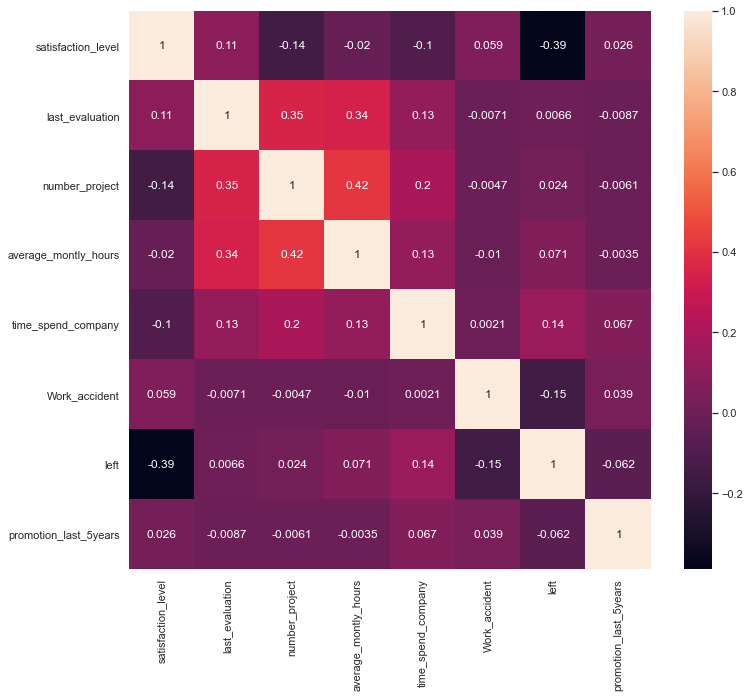

In [14]:
# hr_dt_correlation = hr_dt[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years']]
correlation_table = hr_dt[['satisfaction_level', 'last_evaluation', 'number_project', 
                          'average_montly_hours', 'time_spend_company', 'Work_accident', 
                          'left', 'promotion_last_5years']].corr()
sns.heatmap(correlation_table, annot = True)
sns.set(rc={'figure.figsize':(11.7,10.27)})

### 4. Количество сотрудников по отделам:
* sales             4140
* technical         2720
* support           2229
* IT                1227
* product_mng        902
* marketing          858
* RandD              787
* accounting         767
* hr                 739
* management         630

In [15]:
hr_dt_grouped_department = hr_dt.groupby('department').agg('count')['satisfaction_level']
hr_dt_grouped_department.head(len(hr_dt_grouped_department))

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: satisfaction_level, dtype: int64

### 5. Распределение сотрудников по зарплатам
Наибольшее число сотрудников (49%) имеют низкий относительный уровень зарплаты.
43% сотрудников имеют средний уровень зарплаты.
8% сотрудников имеют высокий уровень зарплаты.

In [16]:
hr_dt_grouped_salary = hr_dt.groupby('salary').agg('count')['satisfaction_level'].reset_index()
hr_dt_grouped_salary
hr_dt_grouped_salary['share'] = hr_dt_grouped_salary.apply(share_salary, axis = 1)
hr_dt_grouped_salary.sort_values(by = 'satisfaction_level', ascending = False).head()

,salary,satisfaction_level,share
1,low,7316,0.49
2,medium,6446,0.43
0,high,1237,0.08


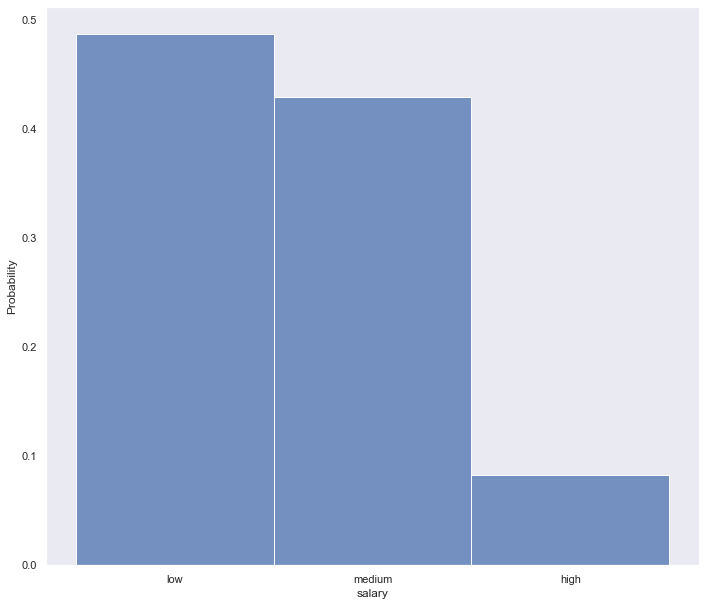

In [17]:
sns.set_style("dark")
sns.histplot(data = hr_dt, x = 'salary', stat = 'probability', discrete = True)
sns.set(rc={'figure.figsize':(6.7,6.27)})

### 6. Распределение сотрудников по зарплатам в разрезе отделов

In [18]:
hr_dt_grouped_dep_salaries = hr_dt.pivot_table(index = ['department', 'salary'], values = 'Work_accident', aggfunc = 'count').reset_index()
hr_dt_grouped_dep_salaries.rename(columns = {'Work_accident':'number_department_salary'}, inplace = True)
hr_merged_salaries = hr_dt_grouped_dep_salaries.merge(hr_dt_grouped_department, on = 'department')
hr_merged_salaries.rename(columns = {'satisfaction_level':'total_number_department'}, inplace = True)
hr_merged_salaries.head()
hr_merged_salaries['share'] = hr_merged_salaries.apply(salary_share, axis = 1)
hr_merged_salaries.head(len(hr_merged_salaries))
hr_merged_salaries.pivot_table(index = ['department', 'salary'], values = ['number_department_salary', 'total_number_department', 'share'], aggfunc = 'sum')

number_department_salary  share  total_number_department
department  salary                                                          
IT          high                          83   6.76                     1227
            low                          609  49.63                     1227
            medium                       535  43.60                     1227
RandD       high                          51   6.48                      787
            low                          364  46.25                      787
            medium                       372  47.27                      787
accounting  high                          74   9.65                      767
            low                          358  46.68                      767
            medium                       335  43.68                      767
hr          high                          45   6.09                      739
            low                          335  45.33                      739
            medium                       359  48.58                      739
management  high                         225  35.71                      630
            low                          180  28.57                      630
            medium                       225  35.71                      630
marketing   high                          80   9.32                      858
            low                          402  46.85                      858
            medium                       376  43.82                      858
product_mng high                          68   7.54                      902
            low                          451  50.00                      902
            medium                       383  42.46                      902
sales       high                         269   6.50                     4140
            low                         2099  50.70                     4140
            medium                      1772  42.80                     4140
support     high                         141   6.33                     2229
            low                         1146  51.41                     2229
            medium                       942  42.26                     2229
technical   high                         201   7.39                     2720
            low                         1372  50.44                     2720
            medium                      1147  42.17                     2720

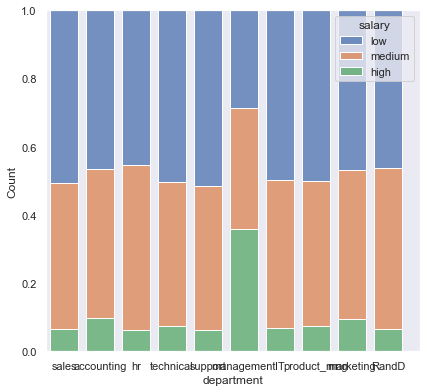

In [19]:
sns.set_style("dark")
sns.histplot(data = hr_dt, x="department", hue="salary", multiple="fill", shrink = 0.8, discrete=True)
sns.set(rc={'figure.figsize':(16.7,6.27)})

### 7. Проверка гипотезы о соотношении времени, проводимом на рабочем месте, и величины оклада сотрудника
* H0: среднее количество часов, проводимых на рабочем месте сотрудником с высоким уровнем дохода, равно среднему количеству часов, проводимых на рабочем месте сотрудником с низким уровнем дохода,
* H1: средние значения разняться

Для проверки применен t-тест.

В результате p-value = 0.47 > 0.1 (при уровне значимости в 90%), следовательно, нулевая гипотеза не может быть отклонена и различие в средних значениях количества часов, проводимых на рабочем месте сотрудниками с высоким уровнем дохода и низким, статистически незначимо.
Это же подтверждается гистограммой и расчетными значениями средних величин выборок.

In [20]:
high_salary_hr_dt = hr_dt[hr_dt['salary'] == 'high']['average_montly_hours']
low_salary_hr_dt = hr_dt[hr_dt['salary'] == 'low']['average_montly_hours']

In [21]:
high_salary_hr_dt.head()

72     149
111    289
189    156
267    129
306    149
Name: average_montly_hours, dtype: int64

In [22]:
t, p_value = stats.ttest_ind(high_salary_hr_dt, low_salary_hr_dt)
t, p_value

(-0.7288680398062308, 0.4661023478267259)

In [23]:
stat, p = mannwhitneyu(high_salary_hr_dt, low_salary_hr_dt)
stat, p

(4507096.5, 0.4120665360429347)

In [24]:
high_salary_hr_dt.mean()

199.86742118027485

In [25]:
low_salary_hr_dt.mean()

200.9965828321487

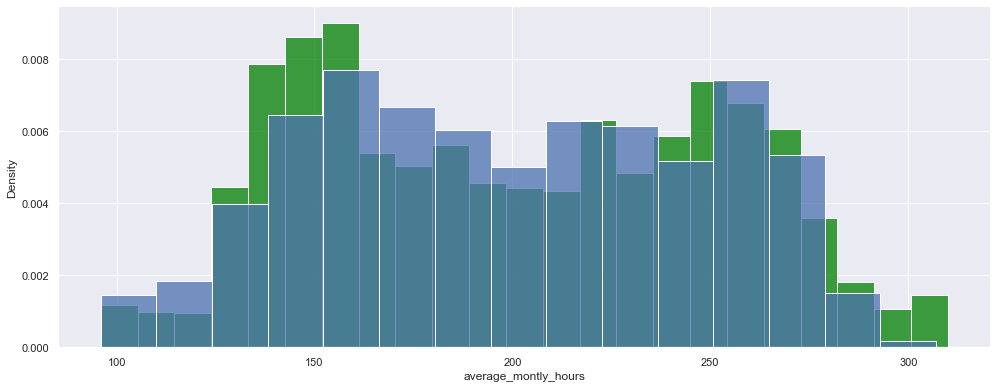

In [26]:
# sns.set_style("dark")
sns.histplot(data = low_salary_hr_dt, stat = 'density', color = 'green')
sns.histplot(data = high_salary_hr_dt, stat = 'density')
sns.set(rc={'figure.figsize':(6.7,6.27)})

### 8. Расчет показателей по уволившимся и действующим сотрудникам компании
Уволившиеся:
* средний уровень удовлетворенности = 0,667
* среднее число проектов = 3,787 (~ 4) проекта
* доля сотрудников, продвинутых по карьерной лестнице за последние 5 лет = 2,63%

Действующие:
* средний уровень удовлетворенности = 0,44
* среднее число проектов = 3,856 (~ 4) проекта
* доля сотрудников, продвинутых по карьерной лестнице за последние 5 лет = 0,53%

In [27]:
hr_dt['promotion_last_5years_duplicate'] = hr_dt['promotion_last_5years']

In [28]:
grouped_by_left = hr_dt.groupby('left').agg({'satisfaction_level':'mean',
                                             'number_project':'mean',
                                             'promotion_last_5years':'sum',
                                             'promotion_last_5years_duplicate':'count'})
grouped_by_left['promotion_last_5years_share'] = grouped_by_left.apply(share_calculate, axis = 1)
del grouped_by_left['promotion_last_5years']
del grouped_by_left['promotion_last_5years_duplicate']
grouped_by_left.head()

,satisfaction_level,number_project,promotion_last_5years_share
left,,,
0,0.666810,3.786664,2.63%
1,0.440098,3.855503,0.53%


### 9. Построение и оценка модели: увольнение сотрудников по имеющимся факторам
По данным метрики accuracy, модель способна предсказать на 75,5% точно, уволится сотрудник или нет, имея определенный набор факторов.
Поскольку набор данных не сбалансирован по классам, рассчитаны еще 2 метрики: precision и recall. Поскольку данных о не уволившихся сотрудника больше, модель лучше распределила позиции в данный класс, в то время как по уволившимся сотрудникам качество модели ниже.

In [29]:
def residuals(row):
    return row['left_fact'] - row['left_predict']

In [30]:
X = hr_dt[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']]
y = np.array(hr_dt['left'])

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 12)

In [32]:
lda = LinearDiscriminantAnalysis()

In [33]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [34]:
result = pd.DataFrame([y_test, lda.predict(X_test)], index = ['left_fact', 'left_predict']).T

In [35]:
result['residual'] = result.apply(residuals, axis = 1)

In [36]:
result.pivot_table(index = 'left_fact', values = 'left_predict', aggfunc = 'count')

,left_predict
left_fact,
0,3397
1,1103


In [37]:
result.head(20)

,left_fact,left_predict,residual
0,0,0,0
1,1,0,1
2,0,0,0
3,0,0,0
4,1,0,1
5,0,0,0
6,0,0,0
7,0,0,0
8,0,0,0
9,0,0,0


In [38]:
accuracy_score(y_test, lda.predict(X_test))

0.7551111111111111

In [39]:
print(classification_report(y_test, lda.predict(X_test), target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85      3397
           1       0.50      0.25      0.34      1103

    accuracy                           0.76      4500
   macro avg       0.65      0.59      0.59      4500
weighted avg       0.72      0.76      0.72      4500

